In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
Titanic_DataSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/tested(TitanicDataSet).csv")

In [5]:
Titanic_DataSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
Titanic_DataSet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<ipython-input-7-1bd51f2a3d7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Titanic_DataSet.corr(),cmap="BuPu")


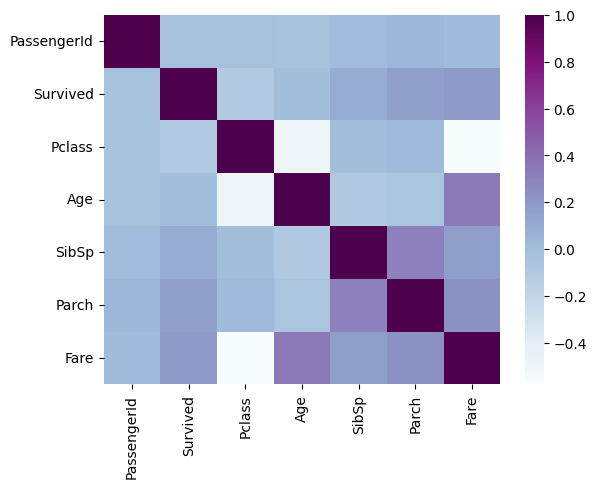

In [7]:
#Checking Corelation of Survival
sns.heatmap(Titanic_DataSet.corr(),cmap="BuPu")
plt.show()

**Corelation with survival**


*   The lower the Pclass the higher the survival
*   The higher the Fare the higher the survival




In [8]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices, test_indices in split.split(Titanic_DataSet,Titanic_DataSet[["Survived","Pclass","Sex"]]) :
  strat_train_set = Titanic_DataSet.loc[train_indices]
  strat_test_set = Titanic_DataSet.loc[test_indices]

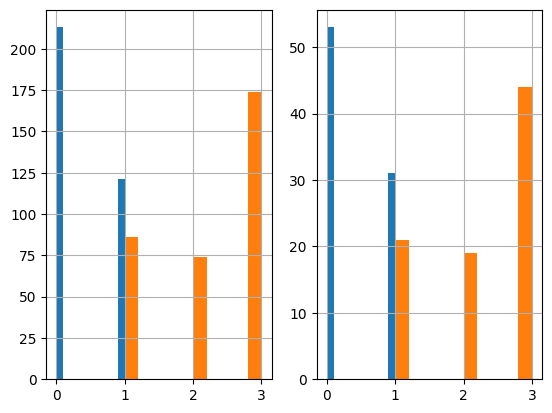

In [9]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

In [10]:

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 405 to 403
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Survived     334 non-null    int64  
 2   Pclass       334 non-null    int64  
 3   Name         334 non-null    object 
 4   Sex          334 non-null    object 
 5   Age          267 non-null    float64
 6   SibSp        334 non-null    int64  
 7   Parch        334 non-null    int64  
 8   Ticket       334 non-null    object 
 9   Fare         333 non-null    float64
 10  Cabin        76 non-null     object 
 11  Embarked     334 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 33.9+ KB


In [11]:
#Handle Missing Values
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    imputer = SimpleImputer(strategy="mean")
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X

In [12]:
#Encoding to Binary Values
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Encode 'Embarked' column
        embarked_encoder = OneHotEncoder()
        embarked_matrix = embarked_encoder.fit_transform(X[['Embarked']]).toarray()

        embarked_col_names = ["C", "S", "Q"]
        for i in range(len(embarked_matrix.T)):
            X[embarked_col_names[i]] = embarked_matrix.T[i]

        # Encode 'Sex' column
        sex_encoder = OneHotEncoder()
        sex_matrix = sex_encoder.fit_transform(X[['Sex']]).toarray()

        sex_col_names = ["Male", "Female"]
        for i in range(len(sex_matrix.T)):
            X[sex_col_names[i]] = sex_matrix.T[i]

        return X





In [13]:
#Dropping Column
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self,X,y=None):
    return self
  def transform(self,X):
    return X.drop(["Embarked","Name","Ticket","Cabin","Sex"],axis=1,errors="ignore")

In [14]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder",FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])


In [15]:
strat_train_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 405 to 403
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Survived     334 non-null    int64  
 2   Pclass       334 non-null    int64  
 3   Name         334 non-null    object 
 4   Sex          334 non-null    object 
 5   Age          267 non-null    float64
 6   SibSp        334 non-null    int64  
 7   Parch        334 non-null    int64  
 8   Ticket       334 non-null    object 
 9   Fare         333 non-null    float64
 10  Cabin        76 non-null     object 
 11  Embarked     334 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 33.9+ KB


In [26]:
new_strat_train_set = pipeline.fit_transform(strat_train_set)
new_strat_train_set['Fare'].fillna(new_strat_train_set['Fare'].mean(), inplace=True)

In [17]:
new_strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
405,1297,0,2,20.00000,0,0,13.8625,1.0,0.0,0.0,0.0,1.0
239,1131,1,1,48.00000,1,0,106.4250,1.0,0.0,0.0,1.0,0.0
216,1108,1,3,30.56367,0,0,7.8792,0.0,1.0,0.0,1.0,0.0
340,1232,0,2,18.00000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
169,1061,1,3,22.00000,0,0,8.9625,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
205,1097,0,1,30.56367,0,0,25.7417,1.0,0.0,0.0,0.0,1.0
315,1207,1,3,17.00000,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
157,1049,1,3,23.00000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
208,1100,1,1,33.00000,0,0,27.7208,1.0,0.0,0.0,1.0,0.0


In [27]:
new_strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 405 to 403
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  334 non-null    int64  
 1   Survived     334 non-null    int64  
 2   Pclass       334 non-null    int64  
 3   Age          334 non-null    float64
 4   SibSp        334 non-null    int64  
 5   Parch        334 non-null    int64  
 6   Fare         334 non-null    float64
 7   C            334 non-null    float64
 8   S            334 non-null    float64
 9   Q            334 non-null    float64
 10  Male         334 non-null    float64
 11  Female       334 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 33.9 KB


**No Missing Values Left**

In [28]:
#Transforming Data into Numpy Array
from sklearn.preprocessing import StandardScaler
X = new_strat_train_set.drop(["Survived"],axis=1)
Y = new_strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data= Y.to_numpy()

In [29]:
#Selecting Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV #To find Optimal HyperParameters
clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10,100,200],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf,param_grid,cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [30]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(n_estimators=10)

In [31]:
new_strat_test_set = pipeline.fit_transform(strat_test_set)
new_strat_test_set['Fare'].fillna(new_strat_test_set['Fare'].mean(), inplace=True)
X_test = new_strat_test_set.drop(["Survived"],axis=1)
Y_test = new_strat_test_set['Survived']
new_strat_test_set.info()

scaler = StandardScaler()
X_testdata = scaler.fit_transform(X_test)
Y_testdata= Y_test.to_numpy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 362 to 72
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  84 non-null     int64  
 1   Survived     84 non-null     int64  
 2   Pclass       84 non-null     int64  
 3   Age          84 non-null     float64
 4   SibSp        84 non-null     int64  
 5   Parch        84 non-null     int64  
 6   Fare         84 non-null     float64
 7   C            84 non-null     float64
 8   S            84 non-null     float64
 9   Q            84 non-null     float64
 10  Male         84 non-null     float64
 11  Female       84 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 8.5 KB


In [32]:
final_clf.score(X_testdata,Y_testdata)

1.0

In [52]:
#Performing Prediction on Whole Data
Final_data = pipeline.fit_transform(Titanic_DataSet)
Final_data['Fare'].fillna(Titanic_DataSet['Fare'].mean(), inplace=True)
X_final = Final_data.drop(["Survived"],axis=1)
Y_final = Final_data['Survived']
X_final.info()
scaler = StandardScaler()
X_finaldata = scaler.fit_transform(X_final)
Y_finaldata= Y_final.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [34]:
Result_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10,100,200],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(Result_clf,param_grid,cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(X_finaldata,Y_finaldata)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200]}],
             return_train_score=True, scoring='accuracy')

In [35]:
Final_Result = grid_search.best_estimator_

In [61]:
Titanic_TestData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/tested(TitanicDataSet).csv")
Titanic_FinalTestData = pipeline.fit_transform(Titanic_TestData)
X_FinalTest=Titanic_FinalTestData.drop(["Survived"],axis=1)
X_FinalTest = X_FinalTest.fillna(method="ffill")
Y_FinalTest = Titanic_FinalTestData['Survived']
X_FinalTest.info()
scaler = StandardScaler()
X_FinalTestData = scaler.fit_transform(X_FinalTest)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [59]:
Predictions = Final_Result.predict(X_FinalTestData)


In [62]:
Result_df = pd.DataFrame(Titanic_TestData["PassengerId"])
Result_df["Survived"] = Predictions
Result_df.to_csv("/content/drive/MyDrive/Colab Notebooks/data/Results(Titanic).csv",index=False)
Result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**Converting the suvival predictions into csv file ("Results(Titanic).csv")**
